## Load Sentinel product as array with snappy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import snappy
from snappy import ProductIO

In [15]:
PRODUCT_PATH = 'data/Sentinel-2/S2A_MSIL2A_20200805_mosaic.dim'
df = ProductIO.readProduct(PRODUCT_PATH)
print("Measurement bands: {}".format(list(df.getBandNames())))

Measurement bands: ['B2', 'B2_count', 'B3', 'B3_count', 'B4', 'B4_count']


In [3]:
blue = df.getBand('B2') 
green = df.getBand('B3') 
red = df.getBand('B4') 

width = df.getSceneRasterWidth()
height = df.getSceneRasterHeight()

blue_data = np.zeros(width * height, np.float32)
green_data = np.zeros(width * height, np.float32)
red_data = np.zeros(width * height, np.float32)

# Populate arrays with pixel value
blue.readPixels(0, 0, width, height, blue_data) 
green.readPixels(0, 0, width, height, green_data) 
red.readPixels(0, 0, width, height, red_data) 

# Reshape
blue_data.shape = (height, width)
green_data.shape = (height, width)
red_data.shape = (height, width)

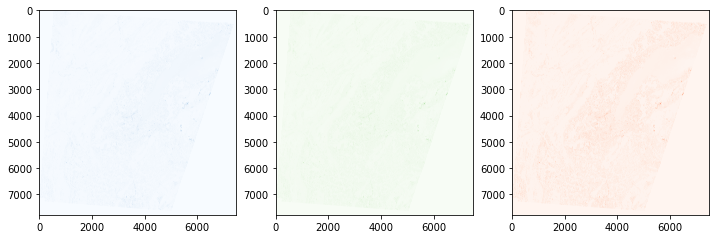

In [13]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(blue_data, cmap=plt.cm.Blues)
axes[1].imshow(green_data, cmap=plt.cm.Greens)
axes[2].imshow(red_data, cmap=plt.cm.Reds)
plt.show()

## Reshape a 2D image into a collection of patches with sklearn

In [27]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import numpy as np

Image shape: (427, 640, 3)


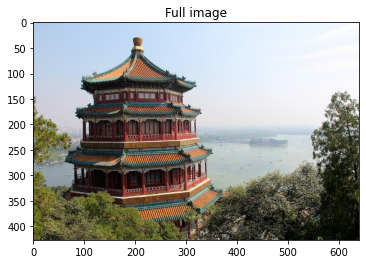

In [28]:
one_image = load_sample_image("china.jpg")
print('Image shape: {}'.format(one_image.shape))
plt.imshow(one_image)
plt.title("Full image")
plt.show()

In [39]:
rows, cols, _ = one_image.shape
patch_shape = (int(np.ceil(rows / 2)), int(np.ceil(cols / 3)))
patches = image.extract_patches_2d(one_image, patch_shape, max_patches=6, random_state=42)
print('Patches shape: {}'.format(patches.shape))

Patches shape: (6, 214, 214, 3)


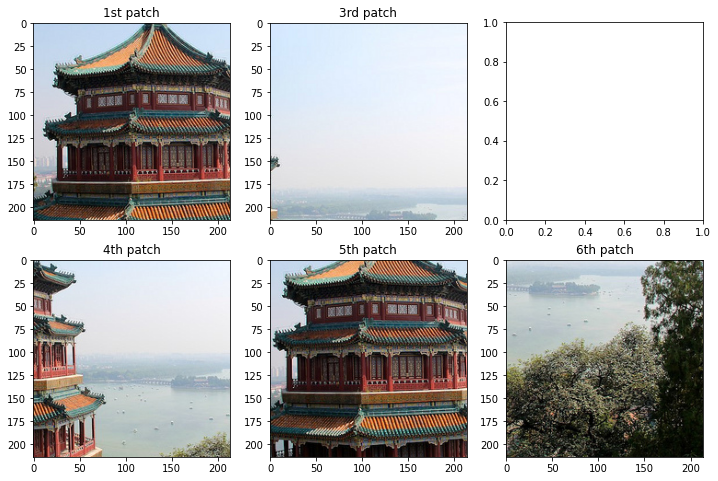

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))
ax[0,0].imshow(patches[0])
ax[0,0].set_title("1st patch")
ax[0,1].imshow(patches[1])
ax[0,1].set_title("2nd patch")
ax[0,1].imshow(patches[2])
ax[0,1].set_title("3rd patch")
ax[1,0].imshow(patches[3])
ax[1,0].set_title("4th patch")
ax[1,1].imshow(patches[4])
ax[1,1].set_title("5th patch")
ax[1,2].imshow(patches[5])
ax[1,2].set_title("6th patch")
plt.show()

In [33]:
ax.shape

(2, 3)

In [36]:
ax[2,0]

IndexError: index 2 is out of bounds for axis 0 with size 2